##  Importing Libraries

In [135]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import missingno as msn
from scipy import stats
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Changing The Current Working Directory

In [136]:
os.chdir(r"C:\Users\ralia\Desktop\Python Course\DataSets")

## Reading The Data

In [137]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [138]:
testId = test["PassengerId"]

In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
train.shape

(891, 12)

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [142]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [143]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
test.shape

(418, 11)

In [145]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [146]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## Combining train and test

In [147]:
df = pd.concat([train,test], axis = 0)

In [148]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
df.drop(['PassengerId'], axis = 1, inplace = True)

In [150]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Some Visiualization for Better Understanding

In [151]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:>

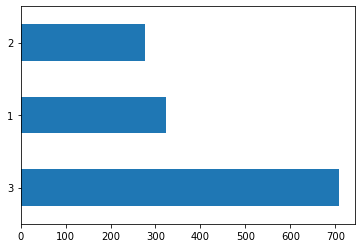

In [152]:
df['Pclass'].value_counts().plot.barh()

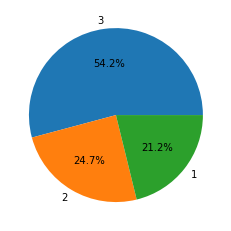

In [153]:
y = np.array(df['Pclass'].value_counts())
mylabels = [3,2,1]

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 

In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


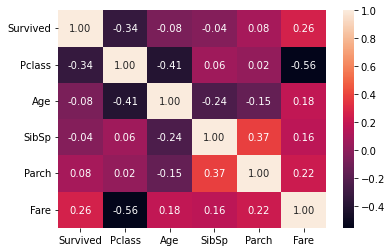

In [155]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

In [156]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

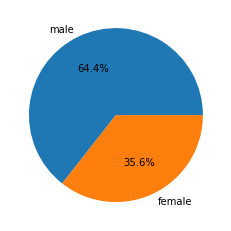

In [158]:
y = np.array(df['Sex'].value_counts())
mylabels = ["male", "female"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 

## Dealing with Null Values

In [159]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [160]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

Cabin       0.774637
Survived    0.319328
Age         0.200917
Embarked    0.001528
Fare        0.000764
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
dtype: float64

<AxesSubplot:>

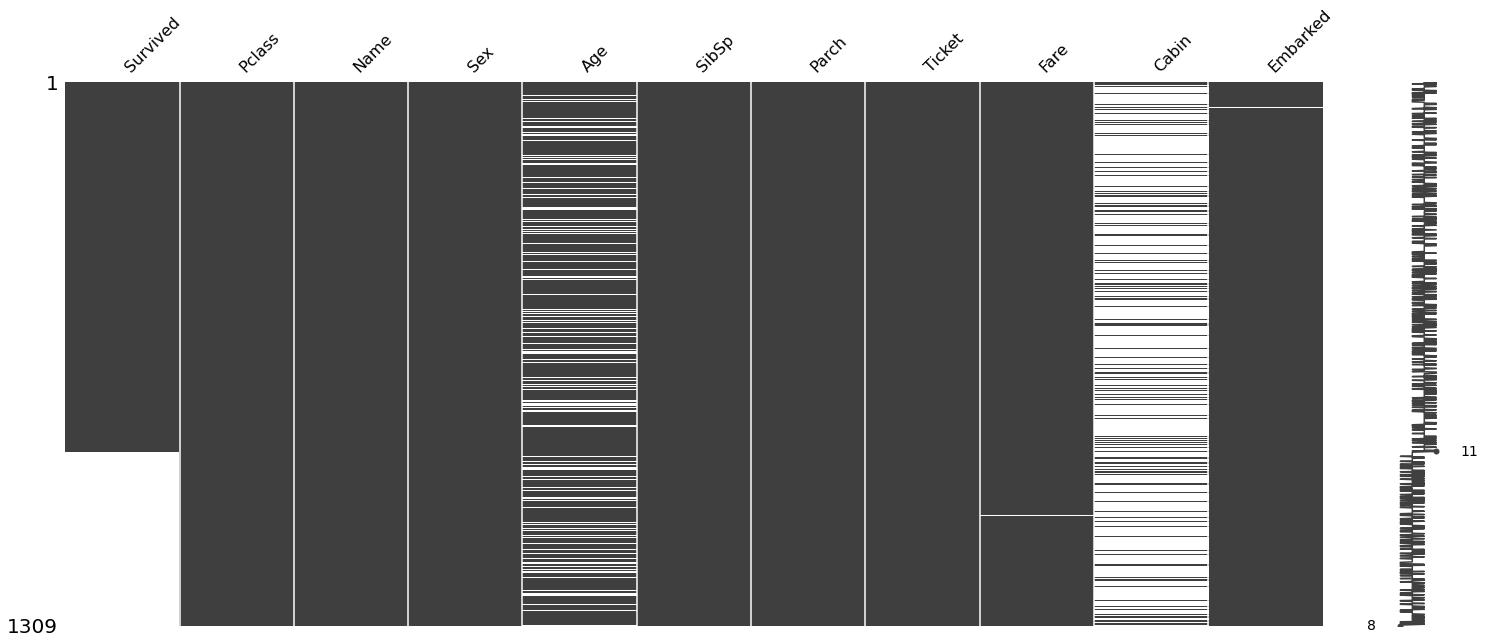

In [161]:
msn.matrix(df)

<AxesSubplot:>

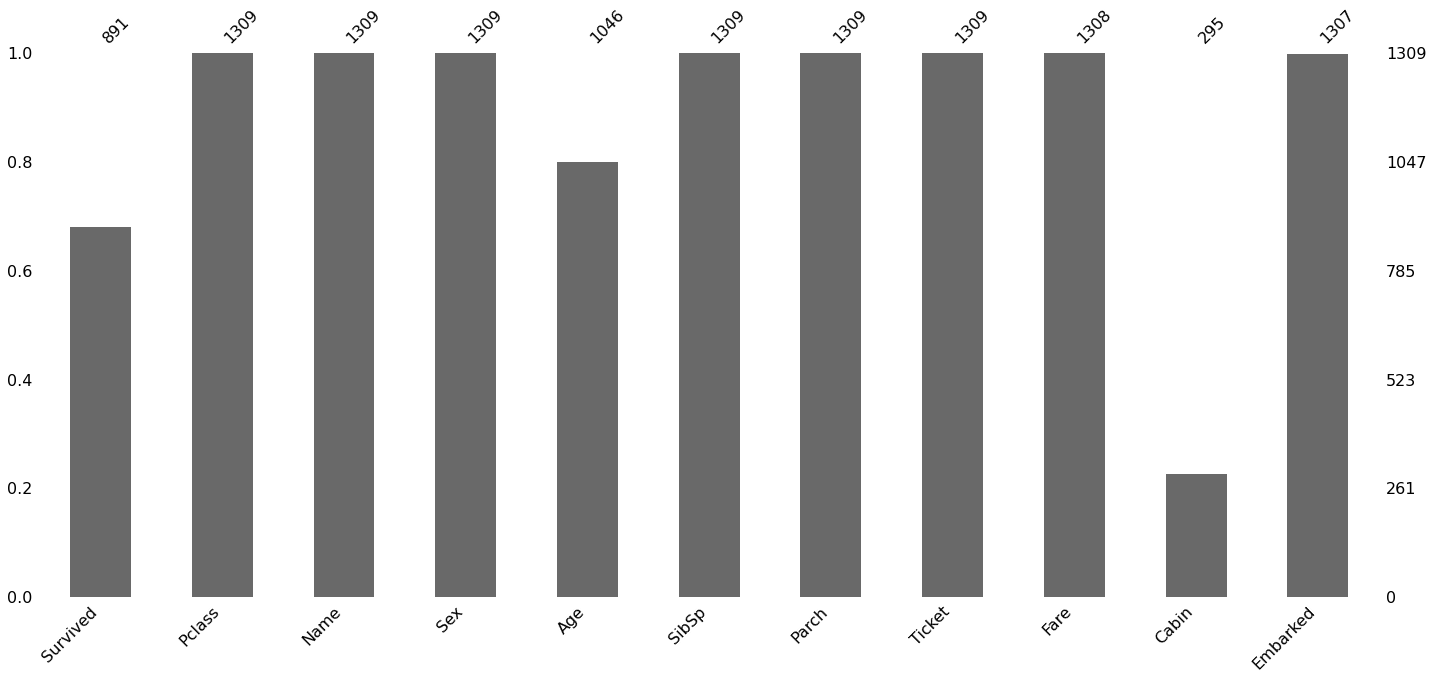

In [162]:
msn.bar(df)

In [163]:
## 1 missing value on the Fare column, filling it with the mean of column
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [164]:
## Dropping Cabin column Because of 77% percent of null values
df.drop('Cabin', axis = 1, inplace = True)

In [165]:
## 2 missing value on the Embarked column, filling it with the mode of fare column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [166]:
## Approximate 20% of Age column is missing. Filling it with median of the column
df['Age']=df['Age'].fillna(df.groupby(['Sex'])['Age'].transform('median'))

In [167]:
## All null values filled
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

Survived    0.319328
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.000000
dtype: float64

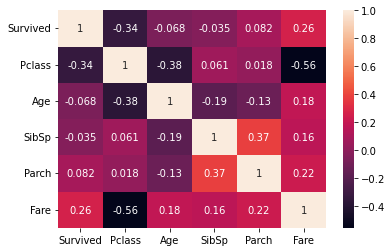

In [168]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Feature Engineering

In [169]:
#Creating new family_size column
df['Family_Size'] = df['SibSp'] + df['Parch']

## Encoding

In [170]:
num_cols = list(df._get_numeric_data().columns)
num_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']

In [171]:
cat_cols = set(df.columns) - set(num_cols)
cat_cols

{'Embarked', 'Name', 'Sex', 'Ticket'}

In [172]:
df = pd.get_dummies(df, drop_first = True)

In [173]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,"Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_W./C. 14263,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Splitting Test and Train data

In [174]:
train_data = df[df['Survived'].notnull()]
test_data = df[df['Survived'].isnull()]

In [175]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,"Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_W./C. 14263,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [176]:
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,"Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_W./C. 14263,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,NaN,3,34.5,0,0,7.8292,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,2,62.0,0,0,9.6875,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,NaN,3,22.0,1,1,12.2875,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [177]:
train_data.shape

(891, 2244)

In [178]:
test_data.shape

(418, 2244)

In [179]:
X = train_data.drop('Survived', axis = 1)
Y = train_data['Survived'].astype('int')

In [180]:
test_data.drop('Survived', axis=1, inplace=True)
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,"Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie",...,Ticket_W./C. 14263,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,27.0,0,0,8.6625,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,22.0,1,1,12.2875,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Scaling

In [181]:
sc = StandardScaler()
X = sc.fit_transform(X)
test_data = sc.fit_transform(test_data) 

## Train Test Splitting

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

## Models

### 1️⃣LightGBM( score = 0.74641)

In [ ]:
model = lgb.LGBMClassifier()

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
gbm_acc = 100*accuracy_score(Y_test, model.predict(X_test))

In [ ]:
pred = model.predict(test_data)

### 2️⃣K-Nearest( score = 0.41148)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train, Y_train)

In [ ]:
pred = knn.predict(test_data)

### 3️⃣Decision Tree( score =  0.75837)

In [188]:
model = DecisionTreeClassifier()

In [189]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [190]:
pred = model.predict(test_data)

In [ ]:
#print("Accuracy:",metrics.accuracy_score(Y_test, pred))

### 4️⃣SVM ( score =  0.75837)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
model = SVC(kernel='linear', random_state = 0)
model.fit(X_train, Y_train)

In [ ]:
pred = model.predict(test_data)

### 5️⃣SVM ( score = 0.74162)

In [184]:
model = GaussianNB()

In [186]:
pred = model.fit(X_train, Y_train).predict(test_data)

## Submission

In [192]:
result = pd.DataFrame()
result['PassengerId'] = testId
result['Survived'] = pred
result.head()
result.to_csv('titan.csv', index = False)